<a href="https://colab.research.google.com/github/vinay-pv/DA203o_Genre_Classification/blob/main/genre_classification_using_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


from sklearn import metrics

In [ ]:
# Download dataset from https://drive.google.com/file/d/1tANyScpS1TKt3gyqt4e2Q4LhkwMsDmka/view?usp=share_link
# and replace the path below in Colab environment (size ~500MB)

df = pd.read_csv('/content/drive/MyDrive/AIML Project/features_augmented.csv')
print(df.shape)

(104343, 521)


In [ ]:
# Select only rows having unique list items in the 'genre_list' feature column
unique_genres = df['genre_list'].apply(lambda x: tuple(sorted(x))).unique()
mask = df['genre_list'].apply(lambda x: tuple(sorted(x))).isin(unique_genres)  # Use 'isin' instead of '=='
df_unique_genres = df[mask]

# Print the resulting dataframe
print(df_unique_genres.shape)

(104343, 521)


In [ ]:
df_unique_genres_no_dup = df_unique_genres.drop_duplicates(subset='genre_list')
print(df_unique_genres_no_dup.shape)

(4767, 521)


In [ ]:
X = df_unique_genres_no_dup.drop(columns='genre_list')

In [ ]:
# Compute correlation matrix
corr = X.corr()

In [ ]:
# Compute correlation matrix
corr_matrix = corr.abs()

# Find columns with correlation greater than or equal to 0.8
high_corr_cols = np.where(corr_matrix >= 0.7)
high_corr_cols = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_cols) if x != y and x < y]

drop_col = {}

if high_corr_cols:
    for col1, col2 in high_corr_cols:
        if col1 != col2:
          drop_col[col1] = drop_col.get(col1, 0) + 1
else:
    print("There are no columns that can be dropped due to high correlation.")

drop_col = {key: value for key, value in drop_col.items() if value >= 2}
print("Column that can finally be dropped : ", len(drop_col))
print(drop_col)

Column that can finally be dropped :  132
{'chroma_cens_kurtosis_04': 17, 'chroma_cens_kurtosis_05': 15, 'chroma_cens_kurtosis_06': 14, 'chroma_cens_kurtosis_07': 14, 'chroma_cens_kurtosis_08': 13, 'chroma_cens_mean_01': 4, 'chroma_cens_mean_02': 5, 'chroma_cens_mean_03': 4, 'chroma_cens_mean_04': 4, 'chroma_cens_mean_05': 4, 'chroma_cens_mean_06': 4, 'chroma_cens_mean_07': 4, 'chroma_cens_mean_08': 4, 'chroma_cens_mean_09': 4, 'chroma_cens_mean_10': 4, 'chroma_cens_mean_11': 4, 'chroma_cens_mean_12': 5, 'chroma_cens_median_01': 4, 'chroma_cens_median_02': 4, 'chroma_cens_median_03': 4, 'chroma_cens_median_04': 4, 'chroma_cens_median_05': 3, 'chroma_cens_median_06': 3, 'chroma_cens_median_07': 4, 'chroma_cens_median_08': 4, 'chroma_cens_median_09': 3, 'chroma_cens_median_10': 4, 'chroma_cens_median_11': 4, 'chroma_cens_median_12': 4, 'chroma_cqt_kurtosis_02': 15, 'chroma_cqt_kurtosis_04': 11, 'chroma_cqt_kurtosis_06': 13, 'chroma_cqt_kurtosis_07': 9, 'chroma_cqt_kurtosis_08': 7, 'chrom

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


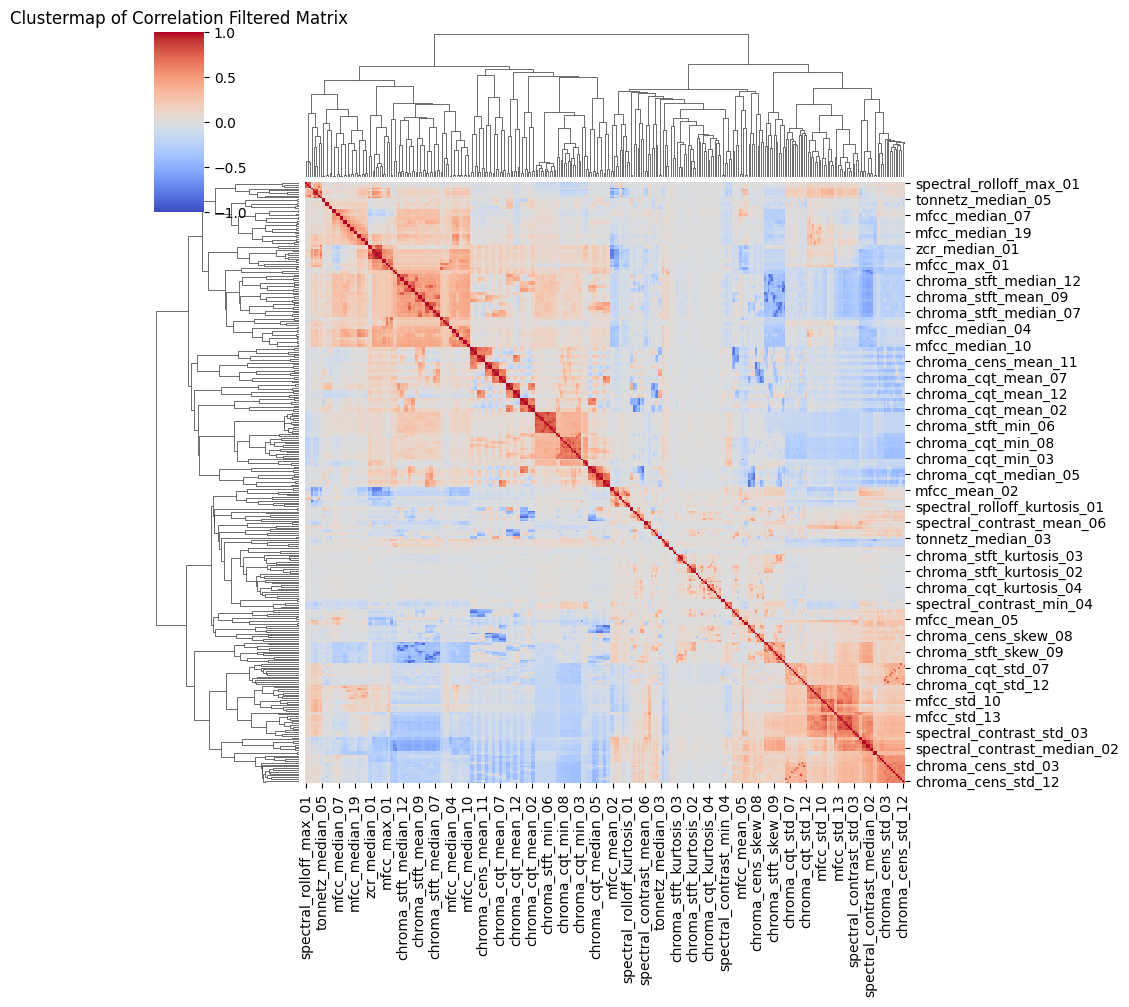

In [ ]:
#Plot the clustermap
df_highly_corr = df[list(set([item for pair in high_corr_cols for item in pair]))]
sns.clustermap(df_highly_corr.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Clustermap of Correlation Filtered Matrix')
plt.show()

In [ ]:
df_cleaned = df.drop(columns=list(drop_col.keys()))
df_cleaned = df_cleaned.drop(columns='Unnamed: 0')
df_cleaned.dropna(subset=['genre_list'], inplace=True)
print(df_cleaned.shape)

(104343, 388)


In [ ]:
#df_cleaned.to_csv("/content/sample_data/features_cleaned.csv")

In [ ]:
N = 50000

df_clean_25k = df_cleaned.sample(n=N, random_state=42)

X = df_clean_25k.drop(['track_id', 'genre_list'], axis=1)
y = df_clean_25k['genre_list']

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(40000, 386)
(10000, 386)


In [ ]:
# create a random forest classifier
rfc = RandomForestClassifier(
    n_estimators=10,
    random_state=42,
    max_depth=7,
    max_features=math.isqrt(X_train.shape[1]))

# fit the model on the training data
clf = OneVsRestClassifier(rfc)
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label 34 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label 35 is present in all training examples.
  warnings.warn(


In [ ]:
# calculate and print the hamming loss and accuracy score of the model
print("Precision:", metrics.precision_score(y_test, y_pred, average='micro',zero_division=1))
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='micro'))
print("Hamming Loss:", metrics.hamming_loss(y_test, y_pred))
print("Coverage error:", metrics.coverage_error(y_test, y_pred))

Precision: 0.7888674057426961
Recall: 0.6945196697211199
F1 Score: 0.7386931424070351
Hamming Loss: 0.14574754098360657
Coverage error: 59.824
